In [1]:
import header
import settings
import pandas as pd
import units
import seaborn as sns
from QUANTAXIS import QA_fetch_stock_list_adv #读取本地股票列表
from QUANTAXIS import QA_fetch_stock_info #读取股票信息(本地)
from QUANTAXIS import QA_fetch_get_stock_info #读取股票信息(在线)

QUANTAXIS>> Expand macros in c:\program files\python36\lib\site-packages\macropy\core\hquotes.py
QUANTAXIS>> Finding macros in 'macropy.core.hquotes'
QUANTAXIS>> Importing macros from 'macropy.core.quotes' into 'macropy.core.hquotes'
QUANTAXIS>> Expand macros in c:\program files\python36\lib\site-packages\macropy\core\quotes.py
QUANTAXIS>> Finding macros in 'macropy.core.quotes'
QUANTAXIS>> Expand macros in c:\program files\python36\lib\site-packages\macropy\core\failure.py
QUANTAXIS>> Finding macros in 'macropy.core.failure'
QUANTAXIS>> Importing macros from 'macropy.core.hquotes' into 'macropy.core.failure'
QUANTAXIS>> failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "c:\program files\python36\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


PLEASE install TALIB to call these methods
PLEASE install TALIB to call these methods


QUANTAXIS>> Expand macros in c:\program files\python36\lib\site-packages\scipy\__config__.py
QUANTAXIS>> Finding macros in 'scipy.__config__'


In [2]:
#使用的指数代码
zs_symbol='000010'

#此数值后面上市的股票暂时不做统计
ipo_date='2013-01-01'

In [5]:
#上证180日线数据
zs_daily=units.fetch_index_day_adv(zs_symbol,settings.stock_daily_start,settings.stock_daily_end)
zs_daily.head(1)

,open,high,low,close,up_count,down_count,volume,amount
date,,,,,,,,
1996-07-04,2130.46,2193.26,2125.18,2192.19,172,83,61818.0,5.856775e+09


In [6]:
zs_daily.loc['1996-07-04']

open          2.130460e+03
high          2.193260e+03
low           2.125180e+03
close         2.192190e+03
up_count      1.720000e+02
down_count    8.300000e+01
volume        6.181800e+04
amount        5.856775e+09
Name: 1996-07-04 00:00:00, dtype: float64

In [7]:
#指数日收益（pandas.Series格式）
zs_daily_return=units.calc_daily_return(zs_daily['close'])

In [8]:
zs_daily_return.head(1)

date
1996-07-08    0.065852
Name: close, dtype: float64

In [3]:
#股票列表
code_list = QA_fetch_stock_list_adv()
code_list.head(1)

,code,decimal_point,name,pre_close,sec,sse,volunit
code,,,,,,,
000001,000001,2,平安银行,328.03,stock_cn,sz,100


In [4]:
#000001相对于指定指数的日收益表格
daily_return_000001=units.get_daily_return('000001',zs_symbol,settings.stock_daily_start,settings.stock_daily_end)
daily_return_000001.head()

,000010,000001
date,,
1996-07-08,0.065852,0.010316
1996-07-09,0.031957,-0.019820
1996-07-10,-0.010555,-0.004289
1996-07-11,-0.050227,-0.018462
1996-07-12,0.018888,0.037618


In [4]:
#批量计算日收益
daily_return=units.get_daily_return(code_list['code'][0:100].values,zs_symbol,settings.stock_daily_start,settings.stock_daily_end)
daily_return.head()

,zs_000010,000001,000002,000004,000005,000006,000007,000008,000009,000010,...,000421,000422,000423,000425,000426,000428,000429,000430,000488,000498
date,,,,,,,,,,,,,,,,,,,,,
1996-07-08,0.065852,0.010316,0.050769,-0.025090,0.108333,0.105505,0.074742,0.034530,0.011038,-0.001678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-09,0.031957,-0.019820,0.038067,0.075980,0.043233,0.000000,-0.021583,-0.030708,0.034934,0.008403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-10,-0.010555,-0.004289,0.009873,0.042141,0.003604,-0.013831,0.066176,0.023416,-0.002110,0.051667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-11,-0.050227,-0.018462,-0.015363,-0.081967,-0.037702,0.018233,-0.055172,-0.053836,0.008457,-0.041204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-12,0.018888,0.037618,0.063830,0.039286,0.054104,0.085399,0.214112,0.038407,0.029350,0.104132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
daily_return.tail()

,zs_000010,000001,000002,000004,000005,000006,000007,000008,000009,000010,...,000421,000422,000423,000425,000426,000428,000429,000430,000488,000498
date,,,,,,,,,,,,,,,,,,,,,
2018-12-24,0.001877,-0.003175,-0.015258,0.011063,0.003534,-0.011132,0.020311,0.028571,0.013304,-0.002882,...,0.010989,-0.006780,0.024629,0.003003,-0.008299,-0.003846,-0.012005,0.010101,0.010545,0.003717
2018-12-25,-0.007271,-0.008493,0.003769,-0.017021,-0.028169,-0.030019,0.002342,0.002525,-0.037199,0.002890,...,-0.015217,-0.013652,-0.003679,-0.017964,-0.033473,-0.027027,0.007290,0.016000,-0.012174,-0.020370
2018-12-26,-0.004896,-0.004283,-0.007092,0.008658,-0.007246,0.011605,0.016355,0.002519,0.009091,-0.017291,...,-0.006623,-0.013841,-0.012063,-0.012195,0.012987,0.003968,-0.003619,-0.021654,0.001761,-0.001890
2018-12-27,-0.002494,-0.002151,-0.015126,-0.017167,-0.029197,-0.013384,-0.060920,-0.022613,-0.031532,-0.038123,...,-0.008889,-0.010526,-0.007227,-0.009259,0.006410,-0.027668,0.004843,-0.020121,-0.015817,-0.051136
2018-12-28,0.007390,0.010776,0.016212,0.000000,0.007519,0.003876,-0.013464,0.000000,0.002326,-0.006098,...,0.000000,0.024823,-0.007279,0.006231,0.057325,0.008130,0.010843,-0.006160,0.001786,0.009980


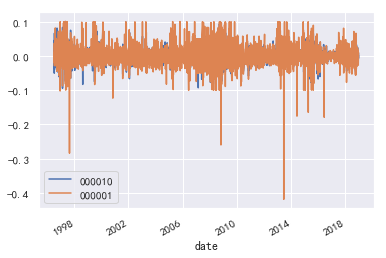

In [11]:
daily_return_000001.dropna().plot()

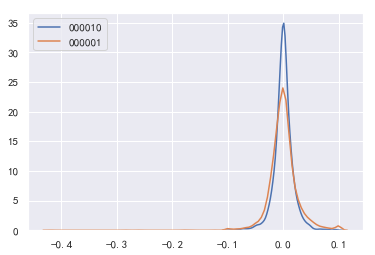

In [14]:
sns.kdeplot(daily_return_000001['000010'].dropna())
sns.kdeplot(daily_return_000001['000001'].dropna())